Index(['Unnamed: 0', 'table1', 'table2', 'sum_table', 'rank1', 'rank2',
       'rank_sum12'],
      dtype='object')
Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5'], dtype='object')
[5.0, 6.0, 30.0, 2.0, 29.0, 23.0, 17.0, 16.0, 1.0, 18.0, 19.0, 10.0, 26.0, 25.0, 7.0, 3.0, 31.0, 11.0, 13.0, 0.0, 20.0, 22.0, 12.0, 8.0, 14.0, 9.0, 24.0, 21.0, 4.0, 27.0, 28.0, 15.0]
[0.0, 28.0, 24.0, 4.0, 16.0, 7.0, 17.0, 19.0, 20.0, 15.0, 6.0, 9.0, 3.0, 23.0, 8.0, 11.0, 25.0, 27.0, 5.0, 22.0, 31.0, 21.0, 18.0, 14.0, 29.0, 13.0, 2.0, 30.0, 1.0, 12.0, 26.0, 10.0]
[6.0, 28.0, 22.0, 7.0, 15.0, 2.0, 17.0, 19.0, 21.0, 16.0, 5.0, 9.0, 0.0, 23.0, 8.0, 12.0, 25.0, 27.0, 3.0, 24.0, 31.0, 20.0, 18.0, 14.0, 29.0, 13.0, 1.0, 30.0, 4.0, 11.0, 26.0, 10.0]
[6.0, 0.0, 30.0, 3.0, 29.0, 23.0, 17.0, 16.0, 1.0, 18.0, 20.0, 11.0, 26.0, 25.0, 7.0, 5.0, 31.0, 10.0, 14.0, 2.0, 19.0, 22.0, 12.0, 8.0, 13.0, 9.0, 24.0, 21.0, 4.0, 28.0, 27.0, 15.0]
0.9835262783887939
0.9976002588983371


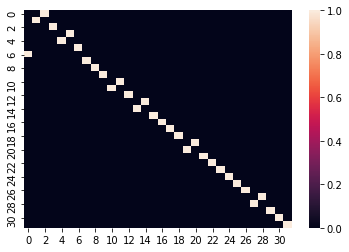

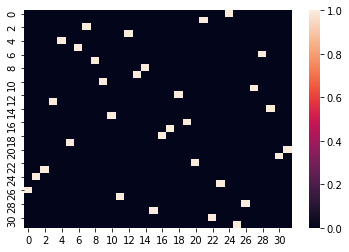

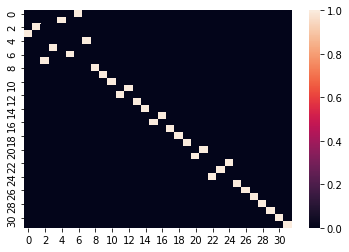

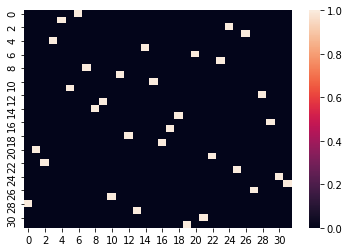

In [20]:
import torch
import pandas as pd
import numpy as np
import random
import itertools
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
import run
from sklearn.metrics import confusion_matrix

#Constant
ADAM = "Adam"
SGD = "SGD"
L0 = "L0"
L1 = "L1"
L2 = "L2"
MSE = "MSE"
CEL = "CEL"
WD = "0005"
ATTENTION = "attention_net"
LINEAR = "linear_net"
RELU = "relu"
SIGMOID = "sigmoid"



%matplotlib inline
%pwd


weights_csv = "/home/li/food/artificial_data/Artificial_20191016_ITEM_NO_32_CLASS_NO_2_DATA_NO_100000_CHOICE_NO_4weights.csv"
model_0_weights_csv = "/home/li/food/plot/20191014/CV/CV_20191014_Epoch_50_Net_attention_net_u_Artificial_Q_9_K_2_F_32_REG_L2_ACT_sigmoid_WD_0005w_fEye_value_matrix_Model_0.csv"
model_4_weights_csv = "/home/li/food/plot/20191014/CV/CV_20191014_Epoch_50_Net_attention_net_u_Artificial_Q_9_K_2_F_32_REG_L2_ACT_sigmoid_WD_0005w_fEye_value_matrix_Model_4.csv"



origin_weight_df = pd.read_csv(weights_csv)
model_0_weight_df = pd.read_csv(model_0_weights_csv)
model_4_weight_df = pd.read_csv(model_4_weights_csv)

print(origin_weight_df.columns)
print(model_0_weight_df.columns)

origin_rank1 = list(origin_weight_df['rank1'])
origin_rank2 = list(origin_weight_df['rank2'])
model_0_rank1 = list(model_0_weight_df['3'])
model_0_rank2 = list(model_0_weight_df['4'])
model_4_rank1 = list(model_4_weight_df['3'])
model_4_rank2 = list(model_4_weight_df['4'])

add_origin_rank = list(np.add(np.array(origin_rank1),np.array(origin_rank2)))
add_model0_rank = list(np.add(np.array(model_0_rank1),np.array(model_0_rank2)))
add_model4_rank = list(np.add(np.array(model_4_rank1),np.array(model_4_rank2)))

print(origin_rank1)
print(origin_rank2)
print(model_4_rank1)
print(model_4_rank2)
print(run.calculate_similarity(add_origin_rank ,add_model0_rank))
print(run.calculate_similarity(add_origin_rank, add_model4_rank))
#print(model_0_weight_df['0'])

plt_path1 = "/home/li/food/plot/20191014/CV/model4_confusion_matirx_origin_rank1_model_rank2.png"
plt_path2 = "/home/li/food/plot/20191014/CV/model4_confusion_matirx_origin_rank1_model_rank1.png"
plt_path3 = "/home/li/food/plot/20191014/CV/model4_confusion_matirx_origin_rank2_model_rank1.png"
plt_path4 = "/home/li/food/plot/20191014/CV/model4_confusion_matirx_origin_rank2_model_rank2.png"


cm1 = confusion_matrix(origin_rank1,model_4_rank2)
plt.figure()
sns.heatmap(cm1)
plt.savefig(plt_path1)
cm2 = confusion_matrix(origin_rank1,model_4_rank1)
plt.figure()
sns.heatmap(cm2)
plt.savefig(plt_path2)
cm3 = confusion_matrix(origin_rank2,model_4_rank1)
plt.figure()
sns.heatmap(cm3)
plt.savefig(plt_path3)
cm4 = confusion_matrix(origin_rank2,model_4_rank2)
plt.figure()
sns.heatmap(cm4)
plt.savefig(plt_path4)


(1000, 34)
(1000, 33)


/home/li/food/neural_network.py:65: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(self.linear_layer1.weight)
/home/li/food/neural_network.py:67: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(self.linear_layer1.bias, mean = 0, std = 1)


[1.00000000e+00 1.91618017e-15]
1000
(1000, 1)


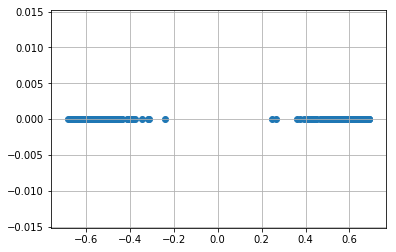

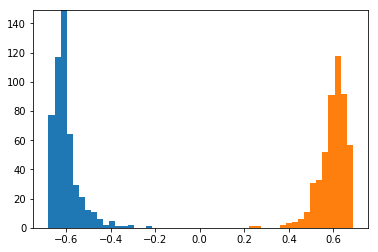

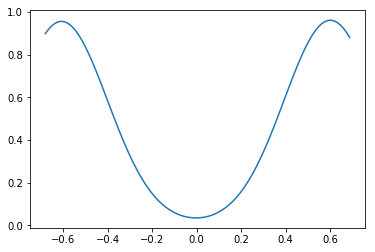

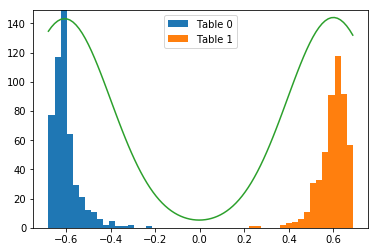

In [54]:
#!/usr/bin/env python3
# -*- coding: UTF-8 -*-

import torch
import pandas as pd
import numpy as np
import random
import itertools
import math
import os

import matplotlib
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
import torch.nn as nn
import torch.autograd as autograd
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms

import sklearn
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

from neural_network import Attention_Net
from neural_network import Linear_Net
from datasets import FoodDataset


########################### FUNCTIONS
def match_output(output,label):
    #print(torch.max(output).item())
    #print(output[0].dot(label[0]).item())
    if torch.max(output).item() == output[0].dot(label[0]).item():
        return 1
    else:
        return 0


########################### PARAMS
#Constant
ADAM = "Adam"
SGD = "SGD"
L0 = "L0"
L1 = "L1"
L2 = "L2"
MSE = "MSE"
CEL = "CEL"
WD = "0005"
ATTENTION = "attention_net"
LINEAR = "linear_net"
RELU = "relu"
SIGMOID = "sigmoid"
DATE = "20191020"

## TRAIN PARAMS
NET = ATTENTION
BATCH_SIZE = 100
LEARNING_RATE = 0.05
WEIGHT_DECAY = 0.005
QUERY_DIM = 9
KEY_DIM = 2
FEATURE_DIM = 32
EPOCH = 50
MOMENTUM = 0.9
REG = L2
ACT = SIGMOID
OPTIMIZER = SGD
BETAS = (0.9,0.999)
LOSS = CEL
MASK = True

## VALIDATE PARAMS
VALIDATE_NUMBER = 1000
MODE = "CV"
ARTIFICIAL = True
w_f = "FIXED"
w_f_type = "Eye"
username = "Artificial"
WD = "0005"



if __name__ == '__main__':

    username = "Artificial"

    extra = "Data_1000_Epoch_" + str(DATE) + "_" + str(EPOCH) + "_Net_" + str(NET) + "_u_" + str(username) + "_Q_" + str(QUERY_DIM) + "_K_" + str(KEY_DIM) + "_F_" + str(FEATURE_DIM) + "_REG_" + str(REG) + "_ACT_" + str(ACT) + "_WD_" + str(WD)

    ## Artificial
    input_csv = "/home/li/food/artificial_data/Artificial_20191020_ITEM_NO_32_CLASS_NO_2_DATA_NO_1000_CHOICE_NO_4input.csv"
    output_csv = "/home/li/food/artificial_data/Artificial_20191020_ITEM_NO_32_CLASS_NO_2_DATA_NO_1000_CHOICE_NO_4output.csv"
    dataset = FoodDataset(input_csv,output_csv)
    #print(dataset[:100])

    plot_path = "/home/li/food/plot/" + str(DATE)
    if not os.path.exists(plot_path):
        os.mkdir(plot_path)
    
    plot_path = plot_path + "/CV/"
    
    if not os.path.exists(plot_path):
        os.mkdir(plot_path)

    model_path = "/home/li/food/model/20191014/CV_20191014_Epoch_50_Net_attention_net_u_Artificial_Q_9_K_2_F_32_REG_L2_ACT_sigmoid_WD_0005w_fEye_CV_Model_4.model"
    

    params = (QUERY_DIM,KEY_DIM,FEATURE_DIM)
    net = Attention_Net(dataset, params, activation = ACT, w_f = "Fixed", w_f_type = "Eye")
    net.load_state_dict(torch.load(model_path))
    net.eval()
    
    dataloader = DataLoader(dataset = dataset,
                            batch_size = 1,
                            shuffle = True,
                            num_workers = 0)


    valid_dist_list = []
    valid_dist_list_1 = []
    valid_dist_list_2 = []
    for data in dataloader:
        out,dist_origin = net.forward(data[0])
        #print(data[0][0][0])
        for dist in dist_origin:
            if int(data[0][0][0]) == 0:
                valid_dist_list_1.append(list(dist.detach().numpy()))
            else:
                valid_dist_list_2.append(list(dist.detach().numpy()))
            valid_dist_list.append(list(dist.detach().numpy()))

    pca = PCA(n_components = 2)
    pca.fit(valid_dist_list)
    valid_feature = pca.transform(valid_dist_list)
    print(pca.explained_variance_ratio_)

    figure = "PCA_valid"
    print(len(valid_feature[:,0]))
    plt.figure()
    plt_file = plot_path + str(extra) + "_" + str(figure) + ".png"
    plt.scatter(valid_feature[:,0], valid_feature[:,1])
    plt.grid()
    plt.savefig(plt_file)
    
    pca1 = pca.transform(valid_dist_list_1)
    pca2 = pca.transform(valid_dist_list_2)
    
    plt.figure()
    figure = "histogram"
    plt_file = plot_path + str(extra) + "_" + str(figure) + ".png"
    plt.hist([pca1[:,0],pca2[:,0]],bins = 50, histtype = "barstacked")
    plt.savefig(plt_file)
    
    print(valid_feature[:,0][:,np.newaxis].shape)
    
    #X = np.concatenate((np.random.normal(0,1,int(0.3 * 20)),np.random.normal(5,1,int(0.7 * 20))))[:,np.newaxis]
    #print(X)
    #print(X.shape)
    
    bw= 0.2
    
    kde = KernelDensity(kernel = "gaussian", bandwidth = bw).fit(valid_feature[:,0][:,np.newaxis])
    
    x_grid = np.linspace(min(valid_feature[:,0]),max(valid_feature[:,0]), num = 100)
    score = kde.score_samples(x_grid[:,np.newaxis])
    
    
    figure = "kernel_density_estimation"
    plt.figure()
    plt.plot(x_grid,np.exp(score))
    plt_file = plot_path + str(extra) + "_" + str(figure) + ".png"
    plt.savefig(plt_file)
    
    figure = "kde_hist"
    plt.figure()
    plt_file = plot_path + str(extra) + "_" + str(figure) + ".png"
    plt.hist([pca1[:,0],pca2[:,0]],bins = 50, histtype = "barstacked",label = ["Table 0","Table 1"])
    
    plt.plot(x_grid,np.exp(score)*150)
    plt.legend(loc = "upper center")
    plt.savefig(plt_file)
    
    
    
    
    
    #plt.xlim(-0.3,0.3)
    #plt.ylim(-0.3,0.3)
    #lt.savefig(plt_file)
    #lt.close('all')